In [1]:
print('Start import')
import socket 
import strax
import straxen
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
import pandas as pd
print(
f'''Working on {socket.getfqdn()} with the following versions 
and installation paths:
strax
\tv{strax.__version__}\t{str(strax.__path__[0])}
straxen
\tv{straxen.__version__}\t{str(straxen.__path__[0])}
''')
from multihist import Hist1d, Histdd
import time
import itertools
import os

from scipy import stats
from straxen import units
from scipy.optimize import curve_fit

import peaks_utility as psu
import drift_diffusion_utility as ddu
import s2widthcut_utility as wcu
import math
import cutax

Start import
Working on midway2-0424.rcc.local with the following versions 
and installation paths:
strax
	v1.1.1	/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/strax
straxen
	v1.1.2	/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/straxen



In [2]:
#st = cutax.xenonnt_v5(cuts_for=['commissioning.krypton_selections', 'commissioning.commissioning_cuts'])
st = cutax.contexts.xenonnt_v5(cuts_for=['science_run_0.krypton_selections','base_cuts'])
#your_dir = '/dali/lgrandi/mpierre/XENONnT/SR0/data/xenonnt_sr0/calibration/kr83m/strax_data'
#st.storage = [strax.DataDirectory(your_dir, readonly=False)] + st.storage

In [3]:
dsets = st.select_runs(include_tags='*sr0*', run_mode='*kr*',available='event_info')

Fetching run info from MongoDB:   0%|          | 0/24595 [00:00<?, ?it/s]

Checking data availability:   0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
dsets1 = dsets[(dsets.end > pd.to_datetime('07/05/2021'))&(dsets.end < pd.to_datetime('07/15/2021'))]

In [5]:
dsets1

,name,number,mode,end,source,start,tags,livetime,raw_records_available,peak_basics_available,event_info_available
6667,024885,24885,tpc_kr83m,2021-07-06 19:59:29.852,kr-83m,2021-07-06 19:29:59.173,_sr0_preliminary,0 days 00:29:30.679000,False,True,True
6670,024882,24882,tpc_kr83m,2021-07-06 19:29:06.009,kr-83m,2021-07-06 18:29:02.385,_sr0_preliminary,0 days 01:00:03.624000,False,True,True
6673,024879,24879,tpc_kr83m,2021-07-06 18:28:09.906,kr-83m,2021-07-06 17:28:06.918,_sr0_preliminary,0 days 01:00:02.988000,False,True,True
6676,024876,24876,tpc_kr83m,2021-07-06 17:27:14.014,kr-83m,2021-07-06 16:27:11.807,_sr0_preliminary,0 days 01:00:02.207000,False,True,True
6679,024873,24873,tpc_kr83m,2021-07-06 16:26:19.007,kr-83m,2021-07-06 15:26:15.817,_sr0_preliminary,0 days 01:00:03.190000,False,True,True
6682,024870,24870,tpc_kr83m,2021-07-06 15:25:23.650,kr-83m,2021-07-06 14:25:22.071,_sr0_preliminary,0 days 01:00:01.579000,False,True,True
6691,024861,24861,tpc_kr83m,2021-07-06 14:24:30.432,kr-83m,2021-07-06 13:24:29.400,_sr0_preliminary,0 days 01:00:01.032000,False,True,True
6697,024855,24855,tpc_kr83m,2021-07-06 13:23:27.861,kr-83m,2021-07-06 12:23:26.955,_sr0_preliminary,0 days 01:00:00.906000,False,True,True
6700,024852,24852,tpc_kr83m,2021-07-06 12:22:36.470,kr-83m,2021-07-06 11:22:35.557,_sr0_preliminary,0 days 01:00:00.913000,False,True,True
6703,024849,24849,tpc_kr83m,2021-07-06 11:21:44.732,kr-83m,2021-07-06 10:21:42.691,_sr0_preliminary,0 days 01:00:02.041000,False,True,True


In [6]:
Kr_runs = np.array(dsets1['name'])

In [7]:
Kr_runs

array(['024885', '024882', '024879', '024876', '024873', '024870',
       '024861', '024855', '024852', '024849', '024846', '024843',
       '024840', '024837', '024834', '024831', '024828', '024825',
       '024822', '024819', '024816', '024813', '024810', '024805',
       '024802', '024799', '024796'], dtype=object)

In [8]:
ev = ddu.merge_runs_kr(st,Kr_runs)

Reading runs from 024796 to 024885
Removing data in ./strax_data/024876-event_pattern_fit-kekbe3fijm to overwrite


/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/straxen/plugins/event_patternfit.py:459: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  for ii in range(n_pts - 1):
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/straxen/plugins/event_patternfit.py:459: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  for ii in range(n_pts - 1):
Exception in thread Target Mailbox (_temp_fayjlnldy2) killed, exception <class 'strax.mailbox.MailboxKilled'>, message (<class 'RuntimeError'>, RuntimeError('Plugin aqmon_hits terminated with leftover aqmon_hits: [024876.aqmon_hits: 1625592428sec 35109400 ns - 1625592433sec 403818520 ns, 963 items, 0.0 MB/s]'), <traceback object at 0x7fdb3cf116c0>)
build:veto_proximity:
Traceback (most recent call last):
  File "/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/strax/plugin.py", line 371, in iter
Exception in th

RuntimeError: Plugin aqmon_hits terminated with leftover aqmon_hits: [024876.aqmon_hits: 1625592428sec 35109400 ns - 1625592433sec 403818520 ns, 963 items, 0.0 MB/s]

In [23]:
ev.to_pickle('/dali/lgrandi/dandrea/data/SR0_v5_Kr83m_20210705_double.pkl')
#ev.to_pickle('/dali/lgrandi/dandrea/data/SR0_v5_Kr83m_20210720_double.pkl')
#ev = pd.read_pickle('/dali/lgrandi/dandrea/data/SR0_v5_Kr83m_20210705_double.pkl')

In [31]:
def diffusion_analysis_kr(ev, title = 'Kr83m', fit_range = (100,1500), FV = True, plot = False ):
    #if(plot): ddu.plot_area_width_aft_kr(ev, title)
    #mask = ddu.mask_KrSingleS1(ev)
    mask = ev['cut_Kr_SingleS1S2']
    #mask &= (ev['cut_s1_max_pmt'])
    #mask &= (ev['cut_daq_veto']) & (ev['cut_s1_area_fraction_top']) & (ev['cut_s2_single_scatter'])
    #maskNW, maskFW = wcu.mask_events_near_wire(ev)
    #maskFV = ev['cut_fiducial_volume']
    if(plot): ddu.plot_area_width_aft_kr(ev[mask], title)
    #wcu.plot_r2_z(ev[mask],title)
    vd, vd_err, cathodedt, gatedt, s2shift = ddu.drift_velocity_kr(ev[mask], title, plot=plot)
    #if FV: evD = ev[mask & maskFW & maskFV]
    #else: evD = ev[mask & maskFW]
    d, d_err, par, par_err = ddu.diffusion_constant_kr(ev[mask],title,fit_range=fit_range,vd = vd,plot=plot)
    #return run, vd, vd_err, d, d_err, cathodedt, gatedt, s2shift, par, par_err

total events 14
Drift velocity = -1221.136~mm/$\mu$s
Diffusion constant = 577822.78 +/- 767581.13 cm$^2$/s 


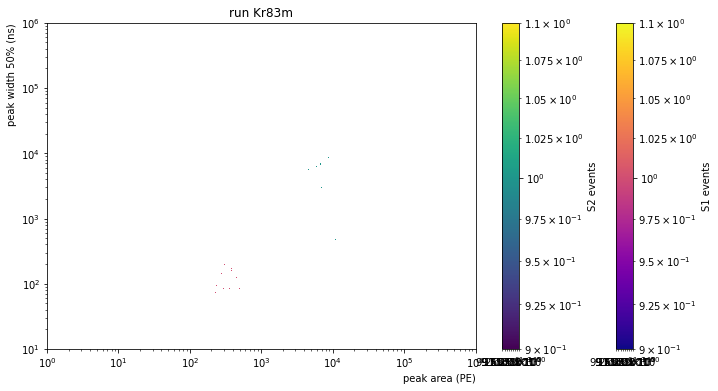

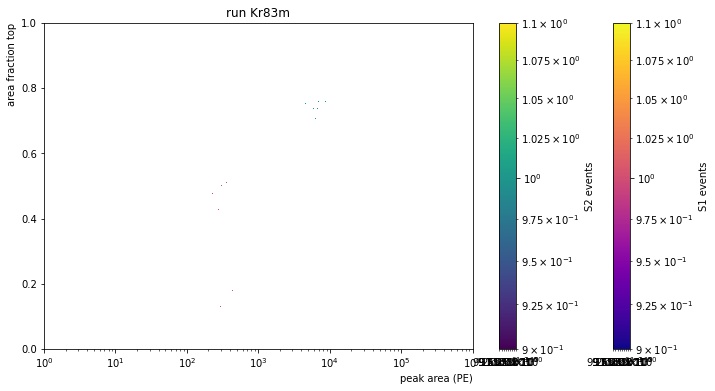

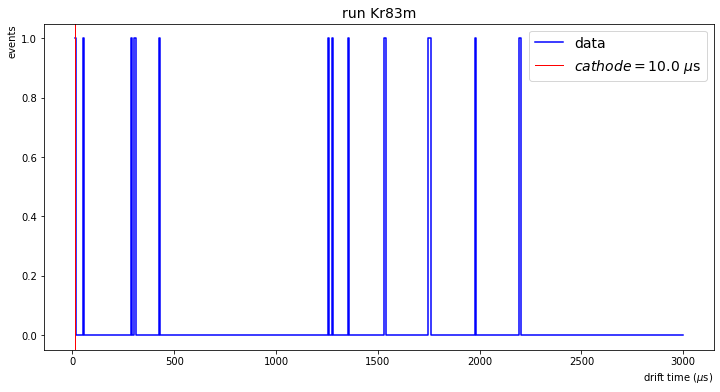

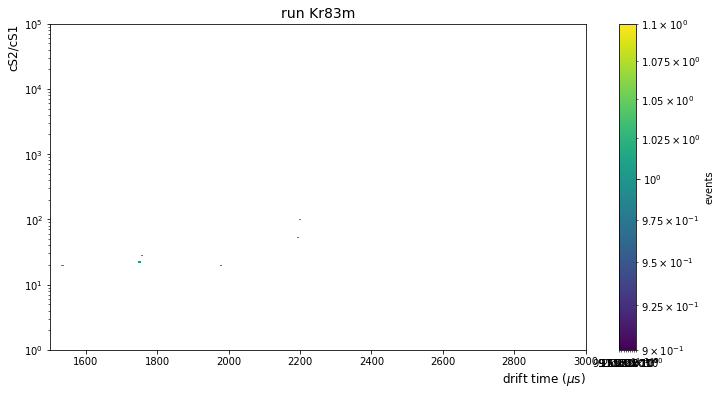

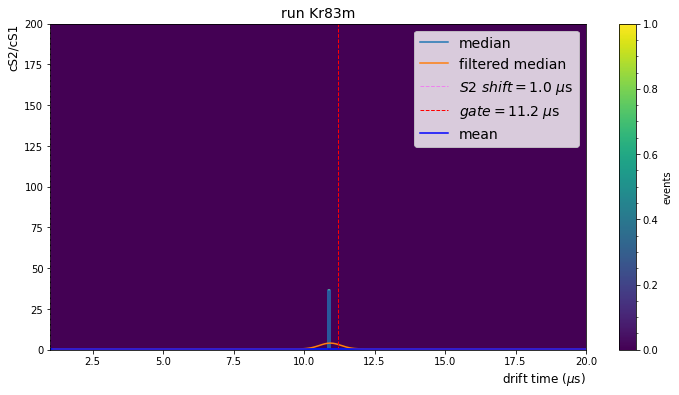

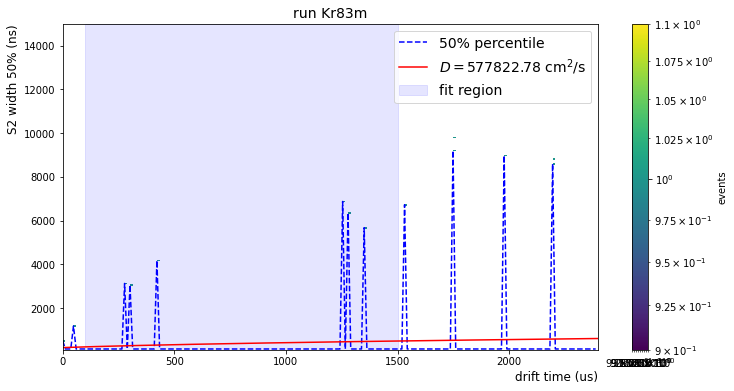

In [38]:
diffusion_analysis_kr(ev0,FV=0,plot=1)

In [ ]:
def compare_drift_velocity(vd_SR0,vd_SR0_err,ms=5):
    with open("DriftVelocity.txt") as f:
        data = f.read()
    data = data.split('\n')
    ind = [row.split('\t')[0] for row in data]
    dt = [row.split('\t')[1] for row in data]
    dv = [row.split('\t')[2] for row in data]
    dt, dv = np.array(dt, dtype=np.float32), np.array(dv, dtype=np.float32)

    with open("DriftVelocity-Hogenbirk.txt") as f:
        data = f.read()
    data = data.split('\n')
    ff = [row.split(' ')[0] for row in data]
    dd = [row.split(' ')[1] for row in data]
    fe = [row.split(' ')[2] for row in data]
    de = [row.split(' ')[3] for row in data]
    ff, fe = np.array(ff, dtype=np.float32), np.array(fe, dtype=np.float32)
    dd, de = np.array(dd, dtype=np.float32), np.array(de, dtype=np.float32)

    with open("DriftVelocity-Njoya.txt") as f:
        data = f.read()
    data = data.split('\n')
    f_n = [row.split(' ')[0] for row in data]
    d_n = [row.split(' ')[1] for row in data]
    d_n, f_n = np.array(d_n, dtype=np.float32), np.array(f_n, dtype=np.float32)

    with open("DriftVelocity-Gushchin.txt") as f:
        data = f.read()
    data = data.split('\n')
    f_g = [row.split(' ')[0] for row in data]
    d_g = [row.split(' ')[1] for row in data]
    d_g, f_g = np.array(d_g, dtype=np.float32), np.array(f_g, dtype=np.float32)
    
    #vd_nT, vd_nT_err = [0.63,0.631], [0.006,0.003]
    #vd_nTb, vd_nTb_err = [0.596,0.619, 0.622], [0.005,0.003,0.003]
    #field_nT = np.full(len(vd_nT),18.3)
    #field_nTb = np.full(len(vd_nTb),18.3)
    field_1T, vd_1T = [155,134,124,92.8], [1.482,1.456,1.440,1.371]
    field_SR0 = np.full(len(vd_SR0),20.3)
    #plt.figure(figsize=(8,4.5))
    fig, ax = plt.subplots(figsize=(8,4.5))
    plt.xlabel('drift field (V/cm)',ha='right',x=1)
    plt.ylabel('drift velocity (mm/$\mu$s)',ha='right',y=1)
    #plt.xscale('log')
    plt.errorbar(dt,dv,yerr=dv*0.02, fmt='o', label='Miller (1968)')
    plt.errorbar(f_g,d_g,yerr=0, fmt='o', label='Gushchin (1982)')
    plt.errorbar(ff,dd,xerr=fe,yerr=de, fmt='o', label='Hogenbirk (2018)')
    plt.errorbar(f_n,d_n,yerr=0, fmt='o', label='Njoya (2019)')
    plt.errorbar(field_1T, vd_1T, yerr=0,fmt='X',c='black',ms=8,lw=0,label='XENON1T')
    #plt.errorbar(field_nTb,vd_nTb,yerr=vd_nTb_err,fmt='o',c='b',ms=10,lw=0,label='XENONnT - bkg')
    #plt.errorbar(field_nT, vd_nT, yerr=vd_nT_err,fmt='o',c='r',ms=10,lw=0,label='XENONnT - Kr83m')
    plt.errorbar(field_SR0, vd_SR0, yerr=vd_SR0_err,fmt='X',c='b',ms=8,lw=0,label='XENONnT - SR0')
    plt.xlim(0,220)
    plt.ylim(0.15,1.75)
    plt.legend()
    axin = ax.inset_axes([0.34, 0.1, 0.3, 0.38])
    axin.errorbar(dt,dv,yerr=dv*0.02, fmt='o', label='Miller (1968)')
    axin.errorbar(f_g,d_g,yerr=0, fmt='o', label='Gushchin (1982)')
    axin.errorbar(ff,dd,xerr=fe,yerr=de, fmt='o', label='Hogenbirk (2018)')
    axin.errorbar(f_n,d_n,yerr=0, fmt='o', label='Njoya (2019)')
    #axin.errorbar(field_nTb,vd_nTb,yerr=vd_nTb_err,fmt='o',c='b',ms=10,lw=0,label='XENONnT - bkg')
    #axin.errorbar(field_nT, vd_nT, yerr=vd_nT_err,fmt='o',c='r',ms=10,lw=0,label='XENONnT - Kr83m')
    axin.errorbar(field_SR0, vd_SR0, yerr=vd_SR0_err,fmt='X',c='b',ms=8,lw=0,label='XENONnT - SR0')
    axin.set_xlim(16.3,24.3)
    axin.set_ylim(0.5,0.7)
    #axin.set_xticklabels('')
    #axin.set_yticklabels('')
    ax.indicate_inset_zoom(axin)
    plt.savefig('driftvelocity-comparison.png',dpi=600)

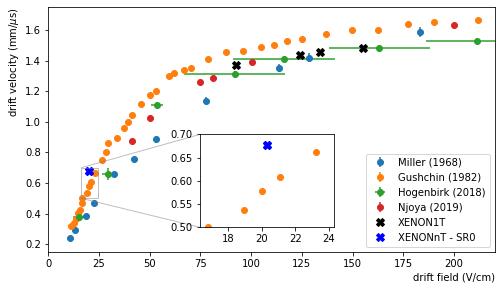

In [ ]:
compare_drift_velocity((vd1,vd1),(vd_err1,vd_err1))

In [10]:
def compare_diffusion(d_SR0,d_SR0_err,ms=5):
    diff_nT = [43.0, 42.7]
    diff_nT_err = [0.06, 0.02]
    diff_nTb = [45.3, 49.3, 52.1]
    diff_nTb_err = [0.6, 0.3, 0.3]
    field_nT = np.full(len(diff_nT),18.3)
    field_nTb = np.full(len(diff_nTb),18.3)
    field_SR0 = np.full(len(d_SR0),20.3)
    plt.figure(figsize=(12,6))
    #plt.errorbar(field_nTb,diff_nTb,yerr=diff_nTb_err,fmt='o',ms=ms,color='b',label='bkg - commissioning')
    plt.errorbar(field_nT,diff_nT,yerr=diff_nT_err,fmt='o',ms=ms,color='r',label='Kr83m - commissioning')
    plt.errorbar(field_SR0,d_SR0,yerr=d_SR0_err,fmt='o',ms=ms,color='g',label='Kr83m - SR0')
    plt.xlabel("drift field (V/cm)", ha='right', x=1)
    plt.ylabel("diffusion constant (cm$^2$/s)", ha='right', y=1)
    plt.legend()

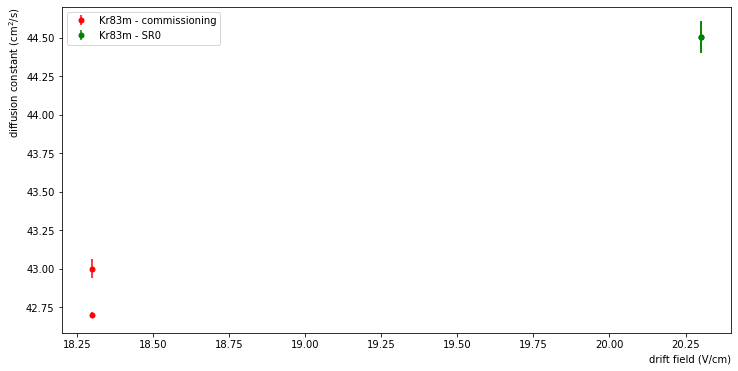

In [11]:
compare_diffusion((diff1,diff1), (diff_err1,diff_err1))

(6.2e-05, 6.9e-05)

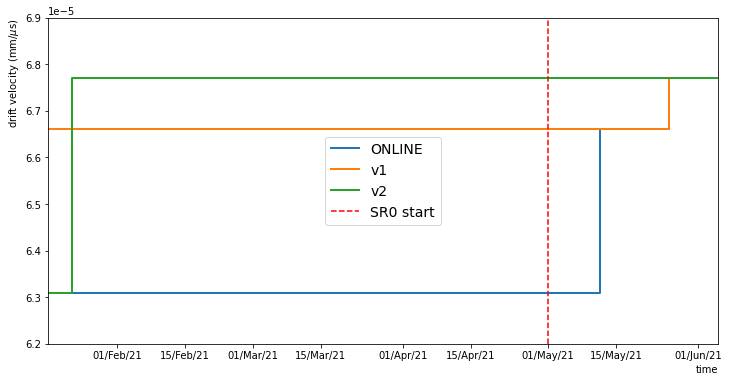

In [68]:
import matplotlib.dates as mdates
times = ['2017-01-01 00:00:00+00:00','2021-01-22 19:04:58+00:00','2021-05-01 00:00:00+00:00',
         '2021-05-11 17:55:00+00:00','2021-05-25 21:20:00+00:00','2021-06-05 00:00:00+00:00',
         '2030-12-31 23:59:59+00:00']
time = pd.to_datetime(times)
v_online = [0.00013325, 6.31e-05, 6.31e-05, 6.31e-05, 6.66e-05, 6.77e-05, 6.77e-05]
v1 = [0.00013325, 6.66e-05, 6.66e-05, 6.66e-05, 6.66e-05, 6.77e-05, 6.77e-05]
v2 = [0.00013325, 6.31e-05, 6.77e-05, 6.77e-05, 6.77e-05, 6.77e-05, 6.77e-05]
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%b/%y'))
plt.plot(time,v_online,lw=2,label='ONLINE',ds='steps')
plt.plot(time,v1,lw=2,label='v1',ds='steps')
plt.plot(time,v2,lw=2,label='v2',ds='steps')
#plt.axvline(time[1],c='black',ls='--',label='commissioning start')
plt.axvline(time[2],c='r',ls='--',label='SR0 start')
plt.xlabel('time',ha='right',x=1)
plt.ylabel('drift velocity (mm/$\mu$s)',ha='right',y=1)
plt.legend(fontsize=14)
plt.xlim(time[1] - np.timedelta64(5, 'D'),time[5])
plt.ylim(6.2e-5,6.9e-5)